In [40]:

import pandas as pd
import numpy as np
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# cargar el csv desde github mediante pandas
data = pd.read_excel('/content/drive/MyDrive/energy.xlsx')


# Eliminar las filas y columnas con valores nulos
data = data.dropna()

# Seleccionar las columnas "Electricity - Exports (GWh)" y "Natural Gas - Exports (Bcf)"
#X = data[['Electricity - consumption(kWh)', 'Natural gas - consumption(cu m)']]
X = data[['Electricity - production(kWh)', 'Natural gas - production(cu m)']]



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el algoritmo de clustering K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)

# Asignar los países a cada uno de los tres clusters
data['Cluster'] = kmeans.labels_

# Mostrar los resultados de la clasificación
print("Países que ganan al vender electricidad:")
print(data[data['Cluster'] == 0]['Country'])
print("Países que ganan al vender gas:")
print(data[data["Cluster"] == 1]["Country"])
print("Países que quedan aproximadamente igual o pierden:")
print(data[data["Cluster"] == 2]["Country"])












Países que ganan al vender electricidad:
0         Afghanistan
1             Albania
2             Algeria
3              Angola
4           Argentina
            ...      
98     United Kingdom
100           Uruguay
101        Uzbekistan
102         Venezuela
103           Vietnam
Name: Country, Length: 102, dtype: object
Países que ganan al vender gas:
99    United States
Name: Country, dtype: object
Países que quedan aproximadamente igual o pierden:
77    Russia
Name: Country, dtype: object


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Nueva sección

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.5 1. ]
 [0.5 0. ]]


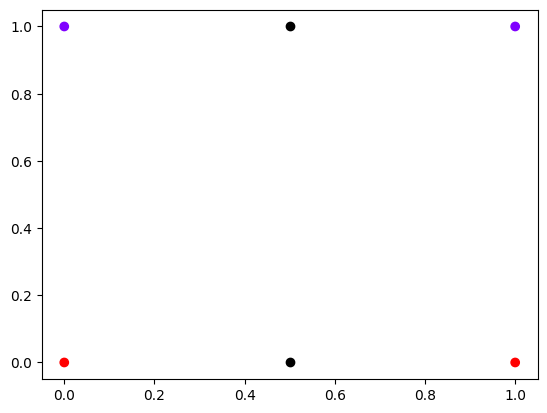

For c=2, The Silhouette Coef is 0.17157287525380985
For c=3, The Silhouette Coef is 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

#plt.scatter(X[:,0],X[:,1], label='True Position')

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

#plt.xlim(0, 9)
#plt.ylim(0, 6.5)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1], color='black')

plt.show()

from sklearn.metrics import silhouette_score
for n_cluster in range(2, 4):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label)
    print("For c={}, The Silhouette Coef is {}".format(n_cluster, sil_coeff))

# Nueva sección